<a href="https://colab.research.google.com/github/fabiobatoni/Cobertura_imuna_Anos_Unidade-Federativas/blob/main/Notebooks/Cobertura_imuna_x_Anos_x_Unidade_Federativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Olá! Bem vindo ao meu repositório relativo ao Segundo Desafio imersão de dados da Alura! Na pasta notebooks, estará uma analise feita em cima dos dados do site DataSUS para entender a taxa de cobertura vacinal do Brasil ao longo dos anos. Abaixo detalherei melhor qual o escopo do projeto, quais dados serão utilizados e como eu pretendo achar um modelo para prever tal situação.

---


# **Desafio Módulo 2 - BootCamp Alura Data Science** 


---




#    **Objetivo**
> Analisar os dados do plano de imunização nacional e entender se todos os anos e estados possuem a mesma taxa de cobertura, tambem entender quais possuem as menores.






---


#    **Escopo** 
    > Comparar os dados do plano de imunização nacional com informações de anos e unidades federativas 



---


#    **Hipóteses** 

  De acordo com PNI (Programa Nacional de Imunização) em 2020. O ideal são taxas sempre acima de 90%


---


#   **Dados utilizados e Fontes de Origem**


1.  Coberturas Vacinais por Unidade da Federação e Ano
2.  Coberturas Vacinais por Unidade da Federação e Imuno
*Todas as tabelas estão disponíveis no site ▶ https://datasus.saude.gov.br/informacoes-de-saude-tabnet/*






---
# ***Conclusões*** 
1.   Analisando todos os anos, podemos identificar que apenas o ano de 2015 atingiu a cobertura de 90%
2.   Estados com menores coberturas de vacinação (Pará, Acre, Rio Grande do Norte, Rio de Janeiro e Amapá).
3.   2015 e 2019 tivemos uma queda de 47%
3.   Doenças menos comum ( Poliomelite )
 

1.   # Tratamento do Data Frame sobre cobertura Vacinal 




In [ ]:
import pandas as pd
import warnings

# Retirando warnings

warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
cobertura_ano = pd.read_csv('https://raw.githubusercontent.com/fabiobatoni/Cobertura_imuna_Anos_Unidade-Federativas/main/Dados/cobertura_vacinal.csv', encoding="ISO-8859-1",
                        sep=";",skiprows = 3, skipfooter = 20,
                        thousands = ".", decimal=",")

vacina = pd.read_csv('https://raw.githubusercontent.com/fabiobatoni/Cobertura_imuna_Anos_Unidade-Federativas/main/Dados/tipo_vacina.csv', encoding="ISO-8859-1",
                        sep=";",skiprows = 3, skipfooter = 20,
                        thousands = ".", decimal=",")

unidade_federacao_ano = pd.read_csv('https://raw.githubusercontent.com/fabiobatoni/Cobertura_imuna_Anos_Unidade-Federativas/main/Dados/unidade_federacao_ano.csv', encoding="ISO-8859-1",
                        sep=";",skiprows = 3, skipfooter = 20,
                        thousands = ".", decimal=",")

unidade_federacao_vacina = pd.read_csv('https://raw.githubusercontent.com/fabiobatoni/Cobertura_imuna_Anos_Unidade-Federativas/main/Dados/imune_federacao.csv', encoding="ISO-8859-1",
                        sep=";",skiprows = 3, skipfooter = 20,
                        thousands = ".", decimal=",")

**Retirando os 3 primeiros caracteres numéricos dos nomes das UFs**

In [ ]:
cobertura_ano["uf"] = cobertura_ano["Unidade da Federação"].str.slice(start=3)
cobertura_ano["Unidade da Federação"] = cobertura_ano["uf"]
cobertura_ano.head()

**Retirando as Colunas Total e uf**

In [ ]:
cobertura_ano = cobertura_ano.drop("Total", axis=1)
cobertura_ano = cobertura_ano.drop("uf",axis=1)
cobertura_ano.head()

**Alterando o nome da Coluna Unidade ds Federação para uf** 

In [ ]:
cobertura_ano = cobertura_ano.rename(columns={'Unidade da Federação':'uf'})
cobertura_ano = cobertura_ano.set_index("uf")
cobertura_ano.head()

**Alterando a estrutura do Data Frame através do .melt para utilizar a biblioteca seaborn e plots distintos**

In [ ]:
cobertura_ano = cobertura_ano.reset_index().melt(id_vars=["uf"], value_vars=cobertura_ano.columns)
cobertura_ano.head()

**Ajustando os nomes das colunas para tornar o novo dataframe mais intuitivo**

In [ ]:
cobertura_ano = cobertura_ano.rename(columns={'value':'cobertura vacinal'})
cobertura_ano = cobertura_ano.rename(columns={'variable':'Ano'})
cobertura_ano.head()

**De acordo com PNI (Programa Nacional de Imunização) em 2020. O ideal são taxas sempre acima de 90%**


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.barplot(data=cobertura_ano, x="Ano",y="cobertura vacinal")
ax.set_title('Cobertura Vacinal por ano ', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Cobertura (%)', fontsize=15, fontweight=600)
y_value=['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.axhline(90,0,1, color='r', **{'ls': '-.', 'lw':5})
plt.show()

# Analisar taxa de imunização por tipo de Vacina

In [ ]:
vacina["uf"] = vacina["Unidade da Federação"].str.slice(start=3)
vacina["Unidade da Federação"] = vacina["uf"]
vacina = vacina.drop("Total", axis=1)
vacina = vacina.drop("uf",axis=1)
vacina.head()
vacina = vacina.rename(columns={'Unidade da Federação':'uf'})
vacina = vacina.set_index("uf")
vacina.head()
vacina = vacina.reset_index().melt(id_vars=["uf"], value_vars=vacina.columns)
vacina.head()
vacina = vacina.rename(columns={'value':'cobertura vacinal'})
vacina = vacina.rename(columns={'variable':'Tipo'})
vacina.head()


In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.barplot(data=vacina, x="Tipo",y="cobertura vacinal", palette="mako")
ax.set_title('Cobertura Vacinal por Imuno', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Cobertura (%)', fontsize=15, fontweight=600)
y_value=['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xlabel('Imuno', fontsize=20, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

***Vacina com menor cobertura de imunização:***
---

                    Poliomielite (Paralisia infantil)

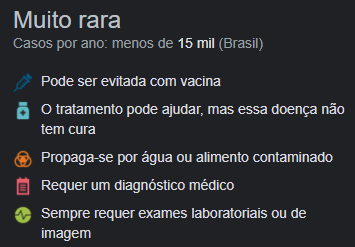

---

                         


**Identificar estados com menor taxa por ano**

In [ ]:
cinco_menores_vacinao = unidade_federacao_ano.sort_values(['Total'], ascending=True).head()
cinco_menores_vacinao

In [ ]:
cinco_menores_vacinao["uf"] = cinco_menores_vacinao["Unidade da Federação"].str.slice(start=3)
cinco_menores_vacinao["Unidade da Federação"] = cinco_menores_vacinao["uf"]
cinco_menores_vacinao = cinco_menores_vacinao.drop("Total", axis=1)
cinco_menores_vacinao = cinco_menores_vacinao.drop("uf",axis=1)
cinco_menores_vacinao = cinco_menores_vacinao.rename(columns={'Unidade da Federação':'uf'})
cinco_menores_vacinao = cinco_menores_vacinao.set_index("uf")
cinco_menores_vacinao = cinco_menores_vacinao.reset_index().melt(id_vars=["uf"], value_vars=cinco_menores_vacinao.columns)
cinco_menores_vacinao = cinco_menores_vacinao.rename(columns={'value':'cobertura'})
cinco_menores_vacinao = cinco_menores_vacinao.rename(columns={'variable':'Ano'})

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=cinco_menores_vacinao, x="Ano",y="cobertura",hue="uf",palette='mako')
ax.set_title('Evolutivo da Cobertura Vacinal por Unidade Federativa', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Cobertura Vacinal', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
ax.text(00, 00, 'Grafico com as 5 unidades federativas que possuem menor taxa de cobertura vacinal', fontsize=15,fontstyle='oblique')
plt.grid(True, linestyle = "--", color='gray')
plt.show()

**Descobrir qual a taxa das vacinas com menores aplicação nos 5 menores estados de cobertura**

In [ ]:
unidade_federacao_vacina = unidade_federacao_vacina.sort_values(['Total'], ascending=True).head(3)

**Separar os 3 menores entre (Pará, Acre, Rio Grande do Norte, Rio de Janeiro e Amapá)**

In [ ]:
unidade_federacao_vacina["uf"] = unidade_federacao_vacina["Unidade da Federação"].str.slice(start=3)
unidade_federacao_vacina["Unidade da Federação"] = unidade_federacao_vacina["uf"]
unidade_federacao_vacina = unidade_federacao_vacina.drop("Total", axis=1)
unidade_federacao_vacina = unidade_federacao_vacina.drop("uf",axis=1)
unidade_federacao_vacina = unidade_federacao_vacina.rename(columns={'Unidade da Federação':'uf'})
unidade_federacao_vacina = unidade_federacao_vacina.set_index("uf")
unidade_federacao_vacina = unidade_federacao_vacina.reset_index().melt(id_vars=["uf"], value_vars=unidade_federacao_vacina.columns)
unidade_federacao_vacina = unidade_federacao_vacina.rename(columns={'value':'cobertura'})
unidade_federacao_vacina = unidade_federacao_vacina.rename(columns={'variable':'imuna'})

In [ ]:
plt.figure(figsize=(50,50))
ax = sns.catplot(data=unidade_federacao_vacina,x="cobertura",y="imuna", kind='bar',col="uf", palette=sns.color_palette("icefire_r",11))
plt.show()

**Fonte informações:** 

https://www.uol.com.br/vivabem/noticias/redacao/2021/09/29/queda-em-taxas-de-vacinacao-deve-ressuscitar-doencas-erradicadas-do-pais.htm

https://www.gov.br/saude/pt-br/acesso-a-informacao/acoes-e-programas/programa-nacional-de-imunizacoes-vacinacao